In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = r"C:\Users\bbuser\Desktop\DataScience-Brain-Bytes\Team_members\from_Hajer\data\Fish.csv"
df = pd.read_csv(path)
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# **Data exploratory**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [5]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [7]:
df.shape

(159, 7)

In [8]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [9]:
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


# **Check for duplicates**

In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
154    False
155    False
156    False
157    False
158    False
Length: 159, dtype: bool

In [11]:
df.duplicated().value_counts()

False    159
Name: count, dtype: int64

# **Check for null values**

In [12]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

# **Feature Engineering**

In [13]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [14]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [15]:
fish = np.array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'])

le = LabelEncoder()
fish_encoded = le.fit_transform(fish)

"Original:", fish
"Encoded:", fish_encoded
"Mapping:", dict(zip(le.classes_, le.transform(le.classes_)))

('Mapping:',
 {np.str_('Bream'): np.int64(0),
  np.str_('Parkki'): np.int64(1),
  np.str_('Perch'): np.int64(2),
  np.str_('Pike'): np.int64(3),
  np.str_('Roach'): np.int64(4),
  np.str_('Smelt'): np.int64(5),
  np.str_('Whitefish'): np.int64(6)})

In [16]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


# **Feature Engineering**

In [18]:
# Encode categorical feature (Species)
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

In [19]:
# Features and target
X = df.drop('Weight', axis=1)
y = df['Weight']

In [20]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
df['Length1_Width'] = df['Length1'] * df['Width']
df['Length2_Width'] = df['Length2'] * df['Width']
df['Length3_Width'] = df['Length3'] * df['Width']

In [22]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width,Length1_Width,Length2_Width,Length3_Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200,93.26400,102.10800,120.60000
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056,103.33440,113.23728,134.33472
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961,112.23679,124.44665,146.04871
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555,117.17965,129.20950,149.25925
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340,136.05100,148.88600,174.55600
...,...,...,...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936,16.02640,17.00192,18.67424
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690,14.84730,15.73560,17.13150
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558,15.19518,16.32540,17.33004
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672,27.28704,29.56096,31.42144


# **Plotting**

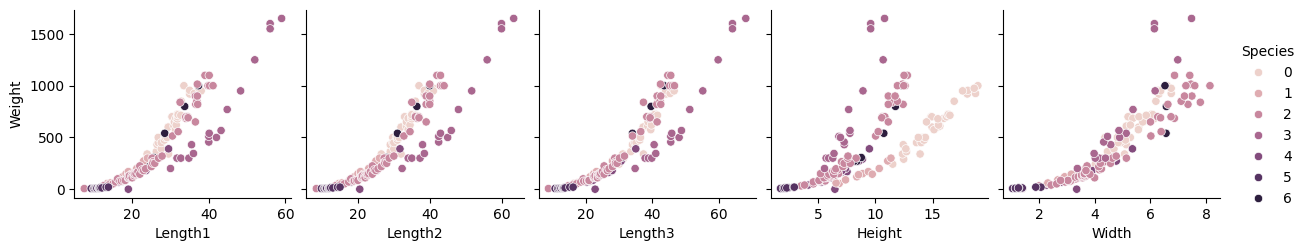

In [23]:
# Scatterplots
sns.pairplot(df, x_vars=['Length1','Length2','Length3','Height','Width'], y_vars='Weight', hue='Species')
plt.show()

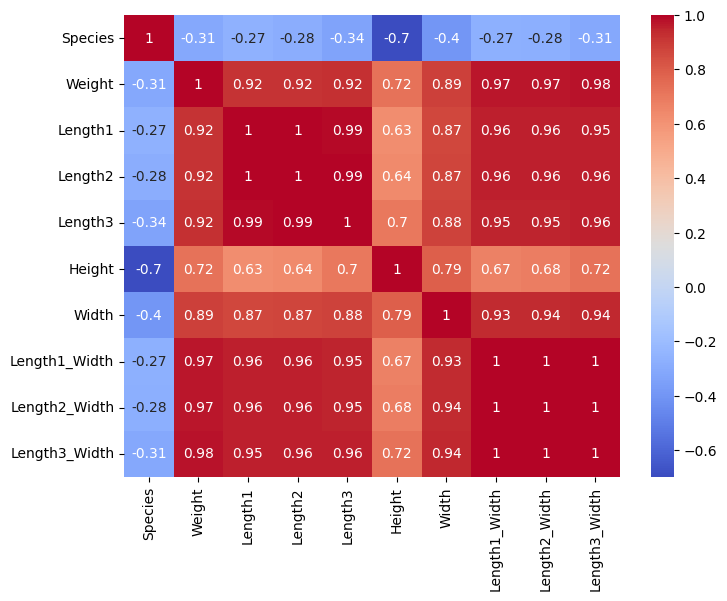

In [24]:
# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [25]:
# Outlier detection with IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# **Model Development and Comparison**

In [26]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R2": r2}

results_df = pd.DataFrame(results).T
print(results_df)


                             RMSE        R2
Linear Regression      117.165765  0.903488
Ridge Regression       117.233000  0.903377
Lasso Regression       116.210952  0.905054
Polynomial Regression   61.714820  0.973223


C:\Users\bbuser\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.522e+05, tolerance: 1.561e+03
  model = cd_fast.enet_coordinate_descent(
